# Chapter 2. Loading Data

### 2.0 Introduction

Lets look at methods to add raw data like logfile, dataset file, database, or cloud blob store such as Amazon S3. Furthermore, often we will want to retrieve data from
multiple sources.

### 2.1 Load a Sample Dataset

Load a pre-existing sample dataset from the scikit-learn library.

In [1]:
from sklearn import datasets

# Check all the pre-existing datasets present
print([name for name in dir(datasets) if not name.startswith('_')])

['clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make_friedman3', 'make_gaussian_quantiles', 'make_hastie_10_2', 'make_low_rank_matrix', 'make_moons', 'make_multilabel_classification', 'make_regression', 'make_s_curve', 'make_sparse_coded_signal', 'make_sparse_spd_matrix', 'make_sparse_uncorrelated', 'make_spd_matrix', 'make_swiss_roll', 'textwrap']


In [2]:
# Load the digits dataset which contains images of hand-written digits
digits = datasets.load_digits()
print([item for item in digits])

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']


In [3]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [4]:
print(digits.feature_names)
print(digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


In [5]:
print(digits.images.shape)

(1797, 8, 8)


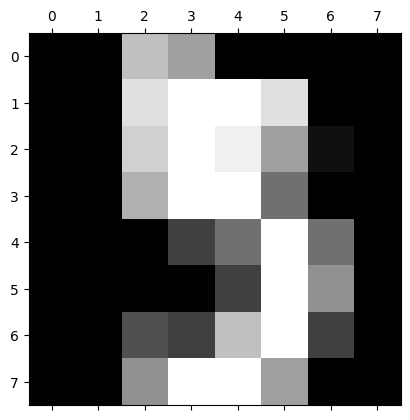

In [6]:
import matplotlib.pyplot as plt

plt.matshow(digits.images[5], cmap="gray")
plt.show()

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### 2.2 Create a Simulated Dataset

Scikit-learn provides many methods to create simulated data, such as:
- `make_regression`: designed to be used with linear regression. It returns **input samples** of shape (n_samples, n_features), **output samples** of shape (n_samples) or (n_samples, n_targets) and **coefficient** of the underlying linear model of shape (n_features) or (n_features, n_targets).

In [8]:
from sklearn.datasets import make_regression

# Generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(
    n_samples=100,    # Total number of data points (rows)
    n_features=5,     # Total number of input features (columns)
    n_informative=2,  # How many of the features actually affect the target
    n_targets=1,      # Number of output variables (1 = standard regression)
    bias=0.0,         # Constant added to the target (intercept term)
    tail_strength=0.5,# Controls how heavy the tails of the feature distribution are
    noise=0.0,        # Standard deviation of gaussian noise added to target
    shuffle=True,     # Randomly shuffle the samples & features
    coef=True,        # Coefficients of model
    random_state=1    # Seed for reproducibility (same data every run)
)

# View feature matrix and target vector
print('Feature Matrix: ', features.shape)
print('Target Vector: ', target.shape)

Feature Matrix:  (100, 5)
Target Vector:  (100,)


- `make_classification`: simulated dataset for classification. If `return_X_y` is True, it returns **input samples** of shape (n_samples, n_features), and **output samples** of shape (n_samples) or (n_samples, n_targets), otherwise it will return **data** a dictionary-like obj with following atteributes:
    - **DESCR** (str): A description of the function that generated the dataset.
    - **parameter** (dict): A dictionary that stores the values of the arguments passed to the generator function.
    - **feature_info** (list of len(n_features)): A description for each generated feature.
    - **X** (ndarray of shape (n_samples, n_features)): The generated samples.
    - **y** (ndarray of shape (n_samples,)): An integer label for class membership of each sample.

In [9]:
from sklearn.datasets import make_classification

# Create a synthetic classification dataset
features, target = make_classification(
    n_samples=100,          # Total number of data points (rows)
    n_features=5,           # Total number of features (columns)
    n_informative=3,        # Features that truly help distinguish the classes
    n_redundant=0,          # Features that are linear combinations of informative ones
    n_repeated=1,           # Features that are duplicated copies of other features
    n_classes=2,            # Number of output classes (binary classification)
    n_clusters_per_class=2, # Number of sub-clusters inside each class
    weights=[0.25, 0.75],   # Class distribution (25% class 0, 75% class 1)
    flip_y=0.01,            # Percentage of labels randomly flipped (label noise)
    class_sep=1.0,          # Distance between classes (larger = easier problem)
    hypercube=True,         # Generate features within a unit hypercube
    shift=0.0,              # Add a constant offset to all features
    scale=1.0,              # Multiply features by this value
    shuffle=True,           # Shuffle samples and feature columns
    random_state=1,         # Seed for reproducible results
    return_X_y=True         # Return (features, target) instead of a dataset object
)

# Inspect the shapes of the generated data
print('Feature Matrix shape:', features.shape)
print('Target Vector shape:', target.shape)

Feature Matrix shape: (100, 5)
Target Vector shape: (100,)


- `make_blobs`: Generate isotropic Gaussian blobs for clustering. It returns **input samples** of shape (n_samples, n_features), **output samples** of shape (n_samples) and **centers** of each cluster (n_centers, n_features) only if `return_centers=True`.

In [10]:
from sklearn.datasets import make_blobs

# Create a synthetic clustering dataset
features, target = make_blobs(
    n_samples=999,           # Total number of data points
    n_features=2,            # Number of features (dimensions per point)
    centers=3,               # Number of clusters to generate
    cluster_std=1.5,         # Standard deviation of clusters (smaller = tighter clusters)
    center_box=(-20.0, 10.0),# Range where cluster centers are randomly placed
    shuffle=True,            # Shuffle the order of samples
    random_state=1,          # Seed for reproducibility
    return_centers=False     # Do not return the actual cluster center coordinates
)

# Inspect the shapes of the generated data
print('Feature Matrix shape:', features.shape)
print('Target Vector shape:', target.shape)

Feature Matrix shape: (999, 2)
Target Vector shape: (999,)


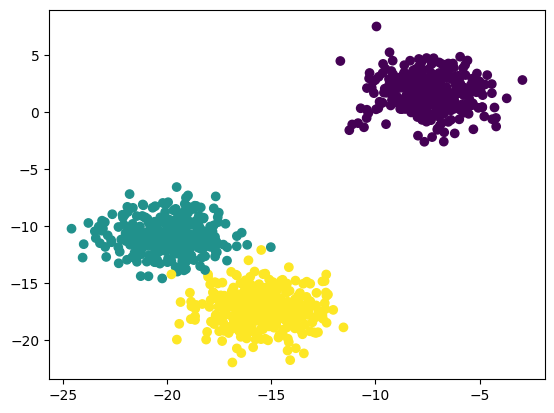

In [11]:
import matplotlib.pyplot as plt

plt.scatter(features[:, 0], features[:, 1], c=target)
plt.show()

### 2.3 Load a File as DataFrame using Pandas

First, look at the content of file to understand what parameters we need to set, then load the file using Pandas.

- `read_csv`: Loads data from CSV / delimited text files. Fast, flexible, most common for flat tabular data. Most-used parameters: 

In [12]:
import pandas as pd

# Load CSV file
dataframe = pd.read_csv('https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.csv')
dataframe.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


In [18]:
# Load Google Sheet as CSV file
dataframe = pd.read_csv('https://docs.google.com/spreadsheets/d/1ehC-9otcAuitqnmWksqt1mOrTRCL38dv0K9UjhwzTOA/export?format=csv')
dataframe.head()

,integer,datetime,category
0,5,2015-01-01 0:00:00,0
1,5,2015-01-01 0:00:01,0
2,9,2015-01-01 0:00:02,0
3,6,2015-01-01 0:00:03,0
4,6,2015-01-01 0:00:04,0


In [ ]:
# Set AWS credentials (replace with your own)
ACCESS_KEY_ID = "xxxxxxxxxxxxx"
SECRET_ACCESS_KEY = "xxxxxxxxxxxxxxxx"

# Load CSV file from S3 bucket
dataframe = pd.read_csv(
    "s3://machine-learning-python-cookbook/data.csv",
    options={
        "key": ACCESS_KEY_ID,
        "secret": SECRET_ACCESS_KEY
    }
)
dataframe.head()

- `read_excel`: Loads data from Excel files (.xls, .xlsx). Supports sheets, ranges, and headers; slower than CSV.

In [13]:
# Load Excel file
dataframe = pd.read_excel('https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx')
dataframe.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


- `read_json`: Loads data from JSON (records, tables, APIs). Good for semi-structured or nested data.

In [14]:
# Load JSON file
dataframe = pd.read_json('https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json')
dataframe.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


- `read_paraquet`: Loads data from Parquet (columnar, binary) format. Very fast, compressed, ideal for big data and analytics pipelines.

In [15]:
# Load Parquet file
dataframe = pd.read_parquet('https://machine-learning-python-cookbook.s3.amazonaws.com/data.parquet')
dataframe.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


- `read_sql_query`: Allows us to make an SQL query to a database and load it. 

In [ ]:
from sqlalchemy import create_engine

# Create connection to the local database
conn = create_engine('sqlite:///sample.db')

# Load data
df = pd.read_sql_query('Select * FROM data', conn)
df.head()

In [ ]:
import pymysql

# Create connection to the remote database
conn = pymysql.connect(
    user='root',
    password='',
    host='localhost',
    database='db'
)

# Load data
df = pd.read_sql_query('Select * FROM data', conn)
df.head()

### 2.4 Load an Avro File

**Apache Avro** is an open source, binary data format that relies on schemas for the
data structure. It is compact, fast serialization, and schema evolution (you can add/remove fields safely). It is used in streaming systems (Kafka), data exchange, logs, big-data pipelines.

In [17]:
import requests
import pandavro as pdx

# Download the file
r = requests.get('https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro')
open('datasets/data.avro', 'wb').write(r.content)

# Load the data
dataframe = pdx.read_avro('datasets/data.avro')
dataframe.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


### 2.5 Load Unstructured Data

In [19]:
# Get the txt file
r = requests.get("https://machine-learning-python-cookbook.s3.amazonaws.com/text.txt")

# Write it to text.txt locally
with open('datasets/text.txt', 'wb') as f:
    f.write(r.content)

# Read in the file
with open('datasets/text.txt', 'r') as f:
    text = f.read()

print(text)

Hello there!
